# Auszüge aus der Java Klassenbibliothek

#### Marcel Lüthi <br/> Departement Mathematik und Informatik


# Agenda

* Collections
* Streams
* Weitere nützliche Pakete.


# Collections

# Collections

> *Collections* fassen Objekte (Elements) zusammen

* Beispiele:
    * Schulklasse (Gruppe von Schülern)
    * Einkaufsliste (Sammlung von Lebensmitteln)


* Auf Instanzen beliebiger Klassen anwendbar (Generic)

# Wichtigste Collections

![collections](./images/collections.png)

# Methoden von Collections

<a href="https://docs.oracle.com/javase/8/docs/api/index.html?java/util/Collection.html"> <img src="./images/collection-api.png"/></a>

<div style="float:left;width:50%">

<h1> Interface List </h1>
<ul>
    <li> Geordnet </li>
    <li> Erlaubt Duplikate </li>
</ul>

<h4> Beispiele </h4>

<ul>
    <li> ArrayList </li>
    <li> LinkedList </li>
</ul>
</div>
<div style="float:right;width:50%">

<h1> Interface Set </h1>
<ul>
    <li> Ungeordnet </li>
    <li> Enthält jedes Element nur einmal </li>
</ul>

<h4> Beispiele </h4>

<ul>
    <li> HashSet </li>
    <li> TreeSet </li>
</ul>
</div>

# Beispiel: Unterschied List/Set

In [256]:
String[] fruits = {"Banana", "Apple", "Mango", "Apple"};

List<String> fruitList = new ArrayList<>();
Set<String> fruitSet = new HashSet<>();

for (String fruit : fruits) {
    fruitList.add(fruit);
    fruitSet.add(fruit);
}
System.out.println("fruitList: "+ fruitList);
System.out.println("fruitSet: "+ fruitSet);


fruitList: [Banana, Apple, Mango, Apple]
fruitSet: [Apple, Mango, Banana]


# Interface Iterable

* Die meisten Collections implementieren das ```Iterable``` interface

* Wichtigste Methoden: 
    * ```void forEach(Consumer<? super T> action)``` : 
    * ```Iterator<T> iterator()```
* Erlaubt "Iterator-form" des for loops:
   * also: ```for (T t : ts) {}```

# Methode forEach 


> ```void forEach(Consumer<? super T> action)```
>
> mit Consumer
>
> ``` interface Consumer<T> void accept(T t); } ```

* Consumer ist ein *FunctionalInterface* 
    * Action kann lambda Ausdruck sein. 
* Action wird für jedes Element der Collection ausgeführt (konsumiert)
 

# Beispiel

* Ausgeben von jedem Element der Liste.

Consumer:

In [257]:
Consumer<String> printElement = f -> System.out.println(f);

Ausgabe:

In [259]:
fruitList.forEach(f -> System.out.println(f));

Banana
Apple
Mango
Apple


# Iterator

* Sequentielles Durchlaufen einer Kollektion
* Wichtigste Methoden:
    * ```boolean hasNext()```
    * ```T next()```


### Beispiel

In [260]:
Iterator<String> it = fruitList.iterator();
while (it.hasNext()) {
    System.out.println(it.next());
}

Banana
Apple
Mango
Apple


# Intermezzo: Iterable selber bauen

> Wir können eigene Klasse bauen, die ```Iterable``` implementiert.
>    * Eigene Klasse unterstützt Iterator-form for loops

Beispiel: Klasse die über die Zahlen 1,2,3 iteriert.

In [261]:
class Iterable123 implements Iterable<Integer> {
    class Iterator123 implements Iterator<Integer> {
        int i = 0;
    
        public boolean hasNext() { if (i < 3) return true; else return false; }
        public Integer next() { i = i + 1; return i; }    
    }
    
    public Iterator<Integer> iterator() { return new Iterator123(); }
}

Iterable123 iterable = new Iterable123();

for (Integer i : iterable) { 
    System.out.println(i);
}

1
2
3


# Maps

Map ist ähnlich wie ```Set```, aber:

* Verlinkt zwei Objekte: *Key* und *Value* (z.B. Produkte mit ihren Preisen)
* Stammt nicht vom Collection Interface ab (z.B. put statt add)
* ```get``` eines Elements via *Key*


# Maps - Hierarchie

![maps](./images/maps.png)

# Beispiel

In [263]:
Map<String, Double> prices = new HashMap<>();

prices.put("Banana", 1.5);
prices.put("Apple", 1.0);
prices.put("Mango", 2.5);

System.out.println("Price of a Mango " +prices.get("Apple"));

Price of a Mango 1.0


#### Übungen
* Was passiert wenn man einen Schlüssel zweimal (mit unterschiedlichem Wert) einfügt
* Schreiben Sie einen for-loop, der alle Preise ausgibt.
    * Tip: Die Schlüssel erhalten Sie via der Methode ```keySet```
* Wie ändert sich die Ausgabe, wenn Sie eine TreeMap verwenden?

# Kollektionen: Beispiel

* Mögliche Modellierung eines "Früchteladens"

```java
import java.util.*;

public class FruitShop {

	HashMap<String, Double> prices = new HashMap<String, Double>();
	
	HashSet<Fruit> products = new HashSet<Fruit>();		

	Queue<Person> customers = new Queue<Person>();
}

```

# Streams

# Streams

> Funktionaler Ansatz um Elemente zu prozessieren

* Aus allen Collection kann mit Methode ```stream ``` ein ```Stream``` Objekt erzeugt werden

* Wichtige Methoden
    * ```map``` 
    * ```filter``` 
    * ```reduce``` 
    * ...



# Map

Signatur (in Interface ```Stream<T>```)

``` <R> Stream<R>  map(Function<T,R> mapper) ```` 
 
* Führt Funktion auf jedem Element vom Stream aus 
    * produziert neue Liste    

# Beispiel: Map

In [265]:

Stream<String> newFruitStream = fruitList.stream().map(f -> f.toUpperCase());
fruitList.stream().forEach(f -> System.out.println(f));

Banana
Apple
Mango
Apple


#### Übung: 

* Nutzen Sie map um einen Stream von Ganzzahlen in einen Stream von Strings umzuwandlen
    * Was ist der Typ von der Funktion ```mapper```

# Filter


Signatur (in Interface ```Stream<T>```)

``` <R> Stream<R>  filter(Predicate<T> filter) ```` 
 
* Gibt Stream mit allen Elementen ```e``` zurück für die gilt ```filter(e) == true```

# Beispiel: Filter

In [266]:
Stream<String> newFruitStream = fruitList.stream().filter(f -> f.contains("n"));
newFruitStream.forEach(f -> System.out.println(f));

Banana
Mango


# Komplexere Filter

Prädikate können zu komplexen Filtern zusammengesetzt werden.

#### Beispiel

In [270]:

import java.util.function.Predicate;

Predicate<String> p1 = (String s) -> s.contains("n");
Predicate<String> p2 = (String s) -> s.contains("M");
Predicate<String> p3 = p1.and(p2).negate();

fruitList.stream().filter(p3).forEach(f -> System.out.println(f));

Banana
Apple
Apple


# Reduce

Signatur (in Interface ```Stream<T>```)

``` <R> Stream<R>  Reduce(T identity, BinaryOperator<T> accumulator) ```` 

* Zieht Element zusammen, durch ausführen von ```accumulator```
* BinaryOperator ist ```FunctionalInterface``` mit zwei Argumenten vom selben Typ      

# Beispiel: Reduce

In [271]:
import java.util.function.BinaryOperator;

BinaryOperator<String> concat = (s, t) -> s + t;
fruitList.stream().reduce("", concat);

BananaAppleMangoApple

#### Übung

* Schreiben Sie eine Funktion, die alle ungeraden Zahlen filtert, diese verdoppelt und dann aufaddiert.

In [274]:
Integer sumDoubleOfOddNumbers(Stream<Integer> s) {
      
    return s.filter(x -> x % 2 == 1).map(x -> x * 2).reduce(0, (x,y) -> x + y);    
}

// generiert stream mit allen Integern zwischen 0 und 100
Stream<Integer> s = IntStream.range(0, 100).boxed();
System.out.println(sumDoubleOfOddNumbers(s));

5000


# Weitere nützliche Pakete


# java.net

> Funktionalität um Netzwerk / Internet Anwendungen zu implementieren

#### Beispiel

In [275]:
import java.net.*;

In [277]:
URL url = new URL("https://news.ycombinator.com");

HttpURLConnection connection = (HttpURLConnection) url.openConnection();
InputStream is = connection.getInputStream();

BufferedReader reader = new BufferedReader(new InputStreamReader(is));
Stream<String> lines = reader.lines();
String response = lines.reduce("", (s,t) -> s + t);

display(response,  "text/html");

<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?sfWFQrbNOqw6NRDBX9jT">            <link rel="shortcut icon" href="favicon.ico">          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>              <a href="newest">new</a> | <a href="newcomments">comments</a> | <a href="show">show</a> | <a href="ask">ask</a> | <a href="jobs">jobs</a> | <a href="submit">submit</a>            </span></td><td style="text-align:right;padding-right:4px;"><span class="pagetop">                              <a href="login?goto=news">login</a>                          </span></td>              </tr></table></td></tr><tr style="height:10px"></tr><tr><td><table border="0" cellpadding="0" cellspacing="0" class="itemlist">              <tr class='athing' id='18724107'>      <td align="right" valign="top" class="title"><span class="rank">1.</span></td>      <td valign="top" class="votelinks"><center><a id='up_18724107' href='vote?id=18724107&amp;how=up&amp;goto=news'><div class='votearrow' title='upvote'></div></a></center></td><td class="title"><a href="https://twitter.com/a_h_a/status/1075510422617219077" class="storylink">Slack closes account of an Iranian user living in Canada</a><span class="sitebit comhead"> (<a href="from?site=twitter.com"><span class="sitestr">twitter.com</span></a>)</span></td></tr><tr><td colspan="2"></td><td class="subtext">        <span class="score" id="score_18724107">521 points</span> by <a href="user?id=jwildeboer" class="hnuser">jwildeboer</a> <span class="age"><a href="item?id=18724107">3 hours ago</a></span> <span id="unv_18724107"></span> | <a href="hide?id=18724107&amp;goto=news">hide</a> | <a href="item?id=18724107">314&nbsp;comments</a>              </td></tr>      <tr class="spacer" style="height:5px"></tr>                <tr class='athing' id='18723936'>      <td align="right" valign="top" class="title"><span class="rank">2.</span></td>      <td valign="top" class="votelinks"><center><a id='up_18723936' href='vote?id=18723936&amp;how=up&amp;goto=news'><div class='votearrow' title='upvote'></div></a></center></td><td class="title"><a href="https://www.virtualbox.org/wiki/Changelog-6.0#v0" class="storylink">VirtualBox 6.0 released</a><span class="sitebit comhead"> (<a href="from?site=virtualbox.org"><span class="sitestr">virtualbox.org</span></a>)</span></td></tr><tr><td colspan="2"></td><td class="subtext">        <span class="score" id="score_18723936">182 points</span> by <a href="user?id=johanhammar" class="hnuser">johanhammar</a> <span class="age"><a href="item?id=18723936">3 hours ago</a></span> <span id="unv_18723936"></span> | <a href="hide?id=18723936&amp;goto=news">hide</a> | <a href="item?id=18723936">99&nbsp;comments</a>              </td></tr>      <tr class="spacer" style="height:5px"></tr>                <tr class='athing' id='18723138'>      <td align="right" valign="top" class="title"><span class="rank">3.</span></td>      <td valign="top" class="votelinks"><center><a id='up_18723138' href='vote?id=18723138&amp;how=up&amp;goto=news'><div class='votearrow' title='upvote'></div></a></center></td><td class="title"><a href="https://techcrunch.com/2018/12/19/grab-maps-osm-thailand-southeast-asia/" class="storylink">Grab is messing up OpenStreetMap data in Southeast Asia</a><span class="siteb

* Übung: Filtern Sie alle Zeilen, die den string "points" enthalten.

# java.text

> Länderunabhängiges Formatieren von Text, Datum, Zahlenformaten

#### Beispiel

In [282]:
import java.text.SimpleDateFormat;

Date now = new Date();

SimpleDateFormat format =   new SimpleDateFormat("EEE MMM dd HH:mm:ss:SSS zzz yy");
System.out.println(" 3. " + format.format(now))

 3. Do. Dez. 20 16:10:20:450 MEZ 18


#### Übung

* Lesen Sie die [Dokumentation](https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html) und ändern Sie das Muster so, dass zusätzlich auch Milisekunden ausgegeben werden

# javax.imageio

> Lesen und schreiben von Bildern

#### Beispiel

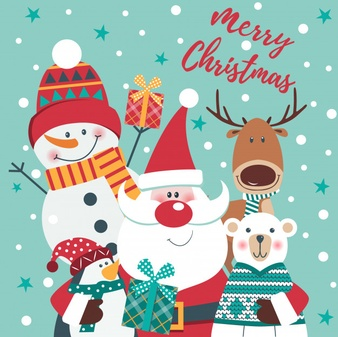

In [283]:
import javax.imageio.ImageIO;
import java.awt.image.BufferedImage;
BufferedImage img = ImageIO.read(new File("./images/merry-christmas.jpg"));

img;
